In [1]:
from ipywidgets.widgets import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def multiplying_medium(k,l,t):
    n = np.exp((k-1)/l*t)
    normalizer = 'n(0)'
    return n,normalizer

def multiplying_medium_const_source(k,l,t):
    if k != 1:
        n = -(l/(k-1))*(1-np.exp((k-1)/l*t))
    else:
        n = t
    normalizer = 'S_0'
    return n,normalizer

def plot_neutron_population(k=1.0,generator='Infinite medium',xaxis=2):
    l = 1 
    t = np.arange(0,xaxis,0.001)
    g,norm = generator(k,l,t)
    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(t,g)
    ax.plot(t,np.ones_like(t),'--')
    ax.set_xlim(0,xaxis)
    ax.set_xlabel('t [s]',fontsize=16)
    ax.set_ylim(0,2)
    ax.set_ylabel('$n(t)/{}$'.format(norm),fontsize=16)
    plt.show()
    

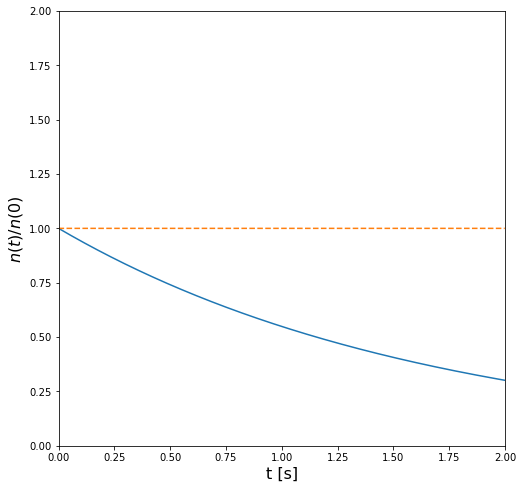

In [4]:
interact(plot_neutron_population,
         k = FloatSlider(value=1,min=0,max=2,step=0.02),
         generator = {'Multiplying medium': multiplying_medium,
                      'Multiplying medium, constant source': multiplying_medium_const_source
                      },
         xaxis=(1,5)
         )